In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Template matching

Xác định các vị trí xuất hiện mẫu (template) có trong ảnh. Việc xác định một vị trí có xuất hiện mẫu đó không được thực hiện bằng các phép toán tương quan kết hợp với việc chuẩn hóa độ sáng.

Thực hiện việc xác định mẫu thông qua việc tính giá trị tương quan khi đặt template tại từng vị trí pixel tương ứng trong ảnh. Việc đó có thể được thực hiện thông qua hàm `matchTemplate` của OpenCV

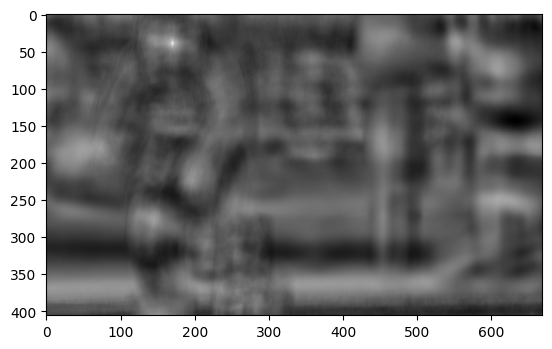

In [2]:
img = cv.imread('images/messi.jpg') 
template = cv.imread('images/messiface.jpg')

res = cv.matchTemplate(img, template, method=cv.TM_CCOEFF_NORMED) # tính độ tương quan bằng phương pháp 'TM_CCOEFF_NORMED'

# plot ảnh kết quả độ tương quan, giá trị càng cao (pixel càng trắng) ứng với độ tương quan tại vị trí đó càng lớn
plt.imshow(res, cmap='gray')

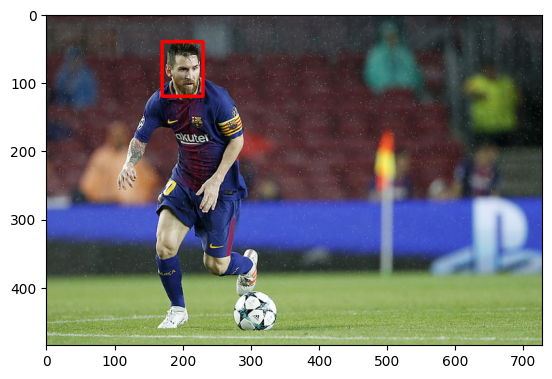

In [3]:
# Xác định vị trí có độ tương quan thấp nhất và cao nhất bằng hàm minMaxLoc
img = cv.imread('images/messi.jpg') 
template = cv.imread('images/messiface.jpg')
h, w = template.shape[:2]
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

# Xác định hình chữ nhật có giá trị tương quan với template cao nhất
top_left = max_loc # góc trái trên của hình chữ nhật
bottom_right = (top_left[0] + w, top_left[1] + h) # góc phải dưới của hình chữ nhật

cv.rectangle(img, top_left, bottom_right, color=(0, 0, 255), thickness=3) # vẽ khung hình chữ nhật có độ tương quan cao nhất

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Xác định các vị trí xuất hiện template trong trường hợp ảnh có nhiều vật thể template cùng xuất hiện. Sử dụng ảnh một màn chơi của tựa game Mario với template là hình ảnh đồng xu.

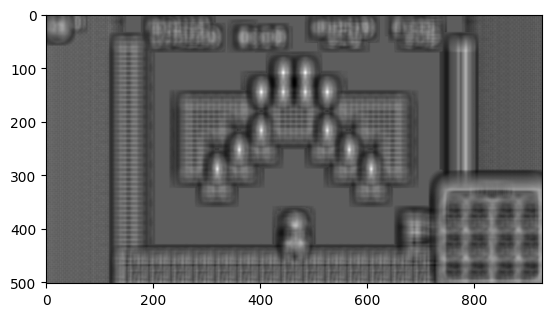

In [4]:
img = cv.imread('images/mario.jpg') 
template = cv.imread('images/coin.jpg')

res = cv.matchTemplate(img, template, method=cv.TM_CCOEFF_NORMED) # tính độ tương quan bằng phương pháp 'TM_CCOEFF_NORMED'

# plot ảnh kết quả độ tương quan, giá trị càng cao (pixel càng trắng) ứng với độ tương quan tại vị trí đó càng lớn
plt.imshow(res, cmap='gray')

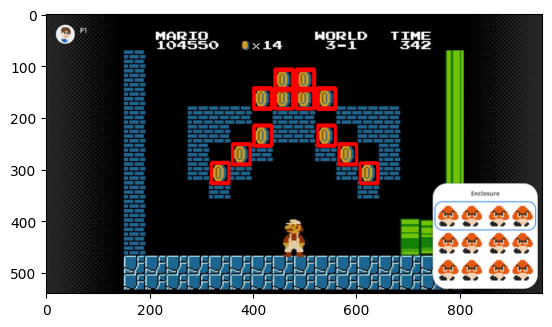

In [5]:
img = cv.imread('images/mario.jpg') 
template = cv.imread('images/coin.jpg')
h, w = template.shape[:2]
threshold = 0.8
loc = np.where(res >= threshold) # trả về các vị trí tọa độ hàng, cột có giá trị tương quan lớn hơn ngưỡng threshold
for top_left in zip(*loc[::-1]):
    # lấy tọa độ x, y (cột, hàng) 
    cv.rectangle(img, top_left, (top_left[0] + w, top_left[1] + h), (0, 0, 255), 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))